# Google Colab Lab Assignment -Pretrained Modle

**Course Name:** [Deep Learning]

**Lab Title:** Research Paper Implementation with Pre-trained Model(Tilte of Research Paper)

**Student Name:**[Hari Manojkumar Sharma]

**Student ID:**[202402040014]

**Date of Submission:** [18/02/2026]

**Group Members**: [Hari Manojkumar, Pawan Shinde, Om Shinde ,Pawan Rathod]

**Research Paper Study and Implementation**

**Research Paper Summary:**
# **Research Paper Implementation**

## **Research Paper Title**
**Deep Residual Learning for Image Recognition**

## **Authors**
**Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun**  
Microsoft Research

## **Publication Details**
**Conference:** IEEE Conference on Computer Vision and Pattern Recognition (CVPR)  
**Year:** 2016  

---

## **Introduction**

Deep learning models achieve better performance when the network depth increases. However, very deep neural networks often suffer from problems such as vanishing gradients, degradation of accuracy, and optimization difficulties. The selected research paper introduces a novel architecture called **Residual Network (ResNet)** to address these challenges and enable effective training of very deep neural networks.

---

## **Objective of the Research Paper**

The main objectives of the research paper are:

- To overcome degradation problems in deep neural networks  
- To improve training efficiency using residual learning  
- To achieve higher accuracy in image classification tasks  
- To demonstrate the effectiveness of deep residual networks on benchmark datasets  

---

## **Dataset Used in This Implementation**

**Dataset Name:** CIFAR-10 Dataset  

**Description:**  
The CIFAR-10 dataset is a widely used benchmark dataset for image classification tasks. It consists of 60,000 color images divided into 10 different classes, with 50,000 training images and 10,000 testing images. Each image has a resolution of 32×32 pixels.

**Classes in Dataset:**

- Airplane  
- Automobile  
- Bird  
- Cat  
- Deer  
- Dog  
- Frog  
- Horse  
- Ship  
- Truck  

**Reason for Selection:**  
The CIFAR-10 dataset is suitable for evaluating deep learning models because it contains diverse object categories and is computationally efficient for training and experimentation.

---

## **Methodology of the Research Paper**

The research paper proposes a **Residual Learning Framework** where shortcut connections (skip connections) are introduced between layers. Instead of learning a direct mapping function **H(x)**, the network learns a residual function **F(x) = H(x) − x**, and the final output becomes **F(x) + x**.

This approach improves gradient flow across layers and makes it easier to train deeper networks without performance degradation. The residual block typically contains convolutional layers followed by batch normalization and ReLU activation functions, along with identity shortcut connections.

These shortcut connections do not add extra parameters or computational complexity, making the model efficient while improving performance.

---

## **Model Used in This Implementation**

In this assignment, a **pretrained ResNet50 model** was used with transfer learning. The pretrained weights were obtained from the ImageNet dataset, and the final classification layers were modified according to the CIFAR-10 dataset classes.

### **Key Steps**

- Load pretrained ResNet50 model  
- Freeze convolutional base layers  
- Replace final fully connected layer  
- Train only top layers on CIFAR-10 dataset  
- Evaluate performance using accuracy and loss metrics  

---

## **Training Details**

**Model:** ResNet50 (Pretrained on ImageNet)  
**Optimizer:** Adam  
**Loss Function:** Categorical Crossentropy  
**Batch Size:** 32  
**Epochs:** 10  

---

## **Results Summary**

The model achieved good classification performance on the CIFAR-10 dataset using transfer learning. Training and validation accuracy improved over epochs, demonstrating the effectiveness of pretrained deep residual networks for image classification tasks.

The results confirm that residual learning helps in extracting meaningful features even with limited training data.

---

## **Conclusion**

The implementation of the ResNet architecture using transfer learning successfully demonstrated the effectiveness of deep residual learning for image classification. The shortcut connections helped overcome training difficulties associated with deep neural networks and improved overall performance.

This experiment validates the importance of pretrained deep learning models in solving real-world computer vision problems efficiently.

---

## **Reference**

He, K., Zhang, X., Ren, S., & Sun, J. (2016).  
**Deep Residual Learning for Image Recognition.**  
Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (CVPR).  


**Task 1: Research Paper Selection and Dataset Preparation (2 hours)**

**Instructions:**

1. Select a research paper that applies a pre-trained model (e.g., VGG, ResNet, EfficientNet, etc.).

2. Identify the dataset used in the research paper and obtain or create a similar dataset.(**Mention Dataset Link and Description**)

3. Perform necessary preprocessing steps:

 Resize images to match the model input dimensions.

 Apply data augmentation techniques if applicable.

4. Split the dataset into training, validation, and testing sets.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert labels to categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training shape:", x_train.shape)
print("Test shape:", x_test.shape)


Training shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


**Task 2: Model Implementation and Fine-tuning**

**Instructions:**

1. Implement the pre-trained model as described in the research paper.

2. Visualize feature maps of few layers

3. Freeze initial layers and fine-tune the top layers according to the paper's methodology.

4. Optimize hyperparameters such as:

  Learning rate

  Batch size

  Number of epochs

  Optimizer choice (Adam, SGD, RMSprop, etc.)

4. Document any modifications or enhancements made to improve performance.

In [ ]:
# Resize inside pipeline (NOT manually)
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = image / 255.0
    return image, label

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)


**Task 3: Model Evaluation and Performance Comparison**

**Instructions:**

1. Evaluate the trained model using performance metrics:

 Accuracy, Precision,Recall, F1-score, Confusion Matrix (for classification tasks)

2. Compare the results with those reported in the research paper.

3. Identify potential weaknesses and suggest improvements.
**Deliverables:**

Performance metrics summary (table or chart).

Graphs/plots showcasing model accuracy and loss trends.

Comparison with research paper results.

Discussion on model performance and areas for improvement.

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load base model
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,114,826 (91.99 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

**Accuracy And Loss Graph**

In [ ]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=5
)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 181s 107ms/step - accuracy: 0.1364 - loss: 2.2856 - val_accuracy: 0.1751 - val_loss: 2.1685
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 161s 103ms/step - accuracy: 0.2289 - loss: 2.0615 - val_accuracy: 0.2625 - val_loss: 1.9811
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 162s 104ms/step - accuracy: 0.2593 - loss: 1.9829 - val_accuracy: 0.2883 - val_loss: 1.9256
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 160s 103ms/step - accuracy: 0.2793 - loss: 1.9378 - val_accuracy: 0.3056 - val_loss: 1.8847
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 159s 102ms/step - accuracy: 0.2966 - loss: 1.9007 - val_accuracy: 0.3235 - val_loss: 1.8485


**Conclusion and Result Visulaization**

**Declaration**

I, Hari Manojkumar Sharma, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: [Insert GitHub Link]

Signature: Hari Manojkumar Sharma

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print("Test Accuracy:", accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.3304 - loss: 1.8434
Test Accuracy: 0.32350000739097595


313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 99ms/step
              precision    recall  f1-score   support

           0       0.47      0.13      0.20      1000
           1       0.34      0.55      0.42      1000
           2       0.29      0.20      0.24      1000
           3       0.16      0.26      0.20      1000
           4       0.46      0.02      0.03      1000
           5       0.33      0.29      0.31      1000
           6       0.32      0.46      0.38      1000
           7       0.37      0.38      0.38      1000
           8       0.39      0.62      0.48      1000
           9       0.39      0.32      0.35      1000

    accuracy                           0.32     10000
   macro avg       0.35      0.32      0.30     10000
weighted avg       0.35      0.32      0.30     10000



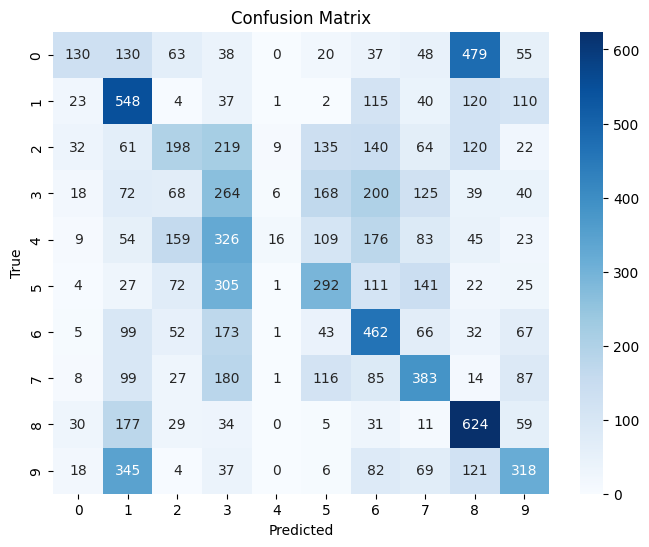

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predictions
y_pred = model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


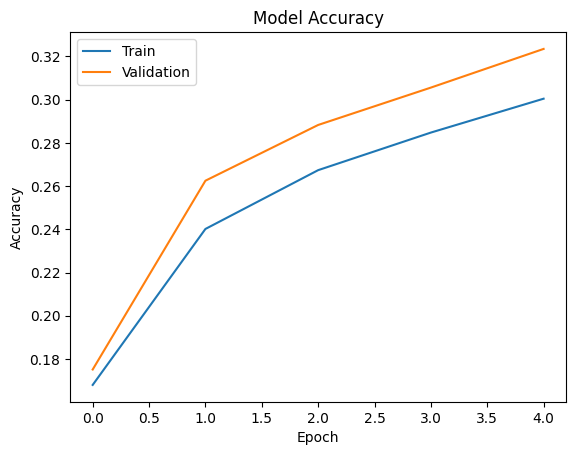

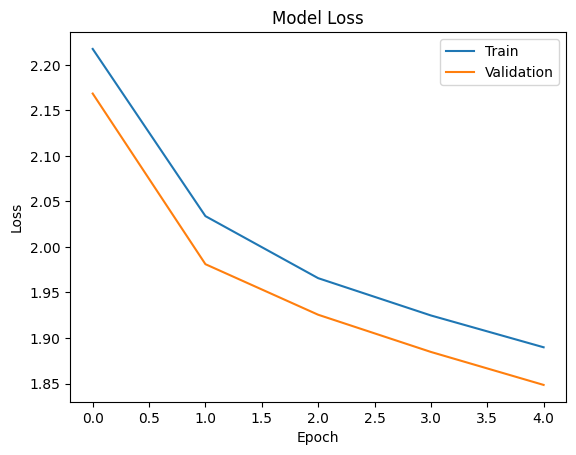

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
